# EE 219 Project 3: Collaborative Filtering

#### Question 1: Compute the sparsity of the movie rating dataset

In [2]:
from surprise import Reader, Dataset
import numpy as np

# Load the data
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)  # Skip the header line
data = Dataset.load_from_file('ratings.csv', reader=reader)

# Find the number of users
user_num = len(np.unique([data[0] for data in data.raw_ratings]))

# Find the number of movies
movie_num = len(np.unique([data[1] for data in data.raw_ratings]))

# Find the number of available ratings
rating_num = len(data.raw_ratings)

print('Total number of available ratings: ', rating_num, 
      '\nTotal number of users: ', user_num, 
      '\nTotal number of movies: ', movie_num, 
      '\nTotal number of possible ratings: ', user_num * movie_num, 
      '\nSparsity: ', rating_num / (user_num * movie_num))


Total number of available ratings:  100004 
Total number of users:  671 
Total number of movies:  9066 
Total number of possible ratings:  6083286 
Sparsity:  0.016439141608663475


#### Question 2: Plot a histogram showing the frequency of the rating values

In [3]:
import matplotlib.pyplot as plt

# Establish bins and count histogram
all_ratings = [data[2] for data in data.raw_ratings]
bins, counts = np.unique(all_ratings, return_counts=True)

# Print the bins and counts
print('Bin values: ', bins,
      '\nFrequencies: ', counts)

# Plot the histogram
fig, ax = plt.subplots()
x_pos = np.arange(len(counts))
ax.bar(x_pos, counts)
ax.set_xticks(x_pos)
ax.set_xticklabels(bins)
ax.set_ylabel('Number of entries in the ratings')
ax.set_title('Histogram: frequencies of the rating values')
plt.show()

# Save the figure
fig.savefig('Figures/Question2.png')

Bin values:  [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ] 
Frequencies:  [ 1101  3326  1687  7271  4449 20064 10538 28750  7723 15095]


#### Question 3: Plot the distribution of ratings among movies

Movie IDs and frequencies in descending order: 
 [[  356   341]
 [  296   324]
 [  318   311]
 ...
 [64660     1]
 [ 6467     1]
 [99992     1]]


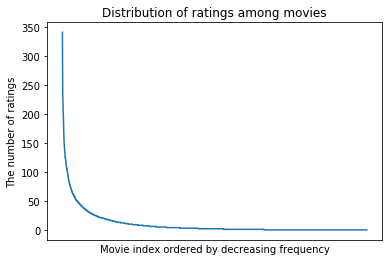

In [3]:
import matplotlib.pyplot as plt

# Count the frequencies of movies
all_movies = [data[1] for data in data.raw_ratings]
movie_ids, movie_counts = np.unique(all_movies, return_counts=True)

# Sort the movies according to the number of ratings
movie_ids_counts = np.concatenate((movie_ids.reshape(-1, 1), movie_counts.reshape(-1, 1)), axis=1).astype(np.int32)
movie_ids_counts = movie_ids_counts[movie_ids_counts[:, 1].argsort()]  # Sort according to the counts
movie_ids_counts = np.flip(movie_ids_counts, axis=0)  # Change to descending order

# Print the movieID and frequencies
print('Movie IDs and frequencies in descending order: \n', movie_ids_counts)

# Plot the distribution
plt.figure()
plt.title("Distribution of ratings among movies")
plt.plot(movie_ids_counts[:, 1])
plt.xticks([])  # Hide the x labels
plt.xlabel('Movie index ordered by decreasing frequency')
plt.ylabel('The number of ratings')
plt.savefig('Figures/Question3.png')  # Save the figure
plt.show()

#### Question 4: Plot the distribution of ratings among users

User IDs and frequencies in descending order: 
 [[ 547 2391]
 [ 564 1868]
 [ 624 1735]
 ...
 [ 289   20]
 [  76   20]
 [   1   20]]


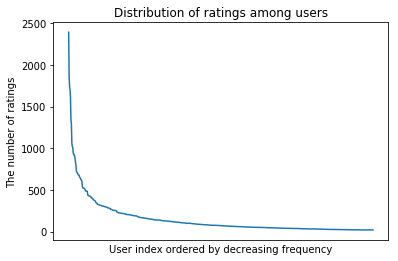

In [7]:
# Count the frequencies of users
all_users = [data[0] for data in data.raw_ratings]
user_ids, user_counts = np.unique(all_users, return_counts=True)

# Sort the users according to the number of ratings
user_ids_counts = np.concatenate((user_ids.reshape(-1, 1), user_counts.reshape(-1, 1)), axis=1).astype(np.int32)
user_ids_counts = user_ids_counts[user_ids_counts[:, 1].argsort()]  # Sort according to the counts
user_ids_counts = np.flip(user_ids_counts, axis=0)  # Change to descending order

# Print the movieID and frequencies
print('User IDs and frequencies in descending order: \n', user_ids_counts)

# Plot the distribution
plt.figure()
plt.title("Distribution of ratings among users")
plt.plot(user_ids_counts[:, 1])
plt.xticks([])  # Hide the x labels
plt.xlabel('User index ordered by decreasing frequency')
plt.ylabel('The number of ratings')
plt.savefig('Figures/Question4.png')  # Save the figure
plt.show()

#### Question 6: Compute the variance of the rating values received by each movie

Movie IDs and variances: 
 [[1.00000000e+00 9.15922241e-01]
 [1.00000000e+01 5.87745230e-01]
 [1.00000000e+02 8.16326531e-01]
 ...
 [9.99120000e+04 0.00000000e+00]
 [9.99170000e+04 0.00000000e+00]
 [9.99920000e+04 0.00000000e+00]]
Bin values:  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5] 
Frequencies:  [5285 2218 1057  307  128   31   22    4   11    0    3]


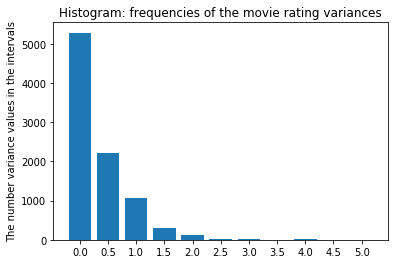

In [8]:
# Change ratings into numpy array
np_movie_ids_ratings = np.array(data.raw_ratings)
np_movie_ids_ratings = np_movie_ids_ratings[:, 1:3].astype(np.float)  # Select the movie ids and ratings

# Calculate variance
movie_vars = np.zeros(movie_ids.shape)
for i in range(len(movie_ids)):
    movie_vars[i] = np.var(np_movie_ids_ratings[np_movie_ids_ratings[:, 0] == int(movie_ids[i])][:, 1])

# Get the movie ID and var table
movie_ids_vars = np.concatenate((movie_ids.reshape(-1, 1), movie_vars.reshape(-1, 1)), axis=1).astype(np.float)

# Print the movieID and var
print('Movie IDs and variances: \n', movie_ids_vars)

# Get histogram
movie_var_bins = np.arange(0, np.max(movie_vars) + 0.5, 0.5)
movie_var_hist, movie_var_edges = np.histogram(movie_vars, movie_var_bins)

# Print the bins and the number of variances
print('Bin values: ', movie_var_edges,
      '\nFrequencies: ', movie_var_hist)

# Plot the histogram
fig, ax = plt.subplots()
x_pos = np.arange(len(movie_var_hist))
ax.bar(x_pos, movie_var_hist)
ax.set_xticks(x_pos)
ax.set_xticklabels(movie_var_edges)
ax.set_ylabel('The number variance values in the intervals')
ax.set_title('Histogram: frequencies of the movie rating variances')
plt.show()

# Save the figure
fig.savefig('Figures/Question6.png')

#### Question 10: Design a k-NN collaborative filter to predict the ratings

Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarit

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done com

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done com

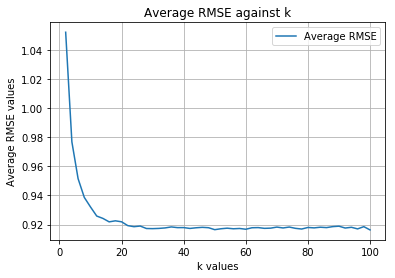

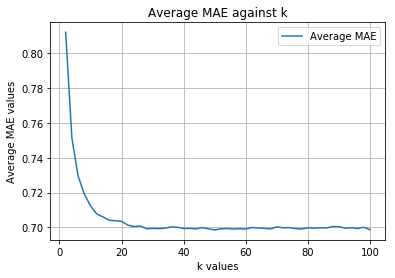

In [9]:
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Store mean RMSE and MAE
RMSEs = []
MAEs = []

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    # Cross validation
    result_dict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))

# Print the average results
print('Average RMSE:\n', RMSEs,
      '\nAverage MAE:\n', MAEs)

# Plot the RMSE graph
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question10_RMSE.png')  # Save the figure
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question10_MAE.png')  # Save the figure
plt.show()

#### Question 11: Use the plot from question 10, to find a 'minimum k'

Answer:
minimum k: 22
The steady state values of average RMSE and average MAE: 0.919, 0.7

#### Question 12: Design a k-NN collaborative filter (popular movie trimming)

In [74]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import matplotlib.pyplot as plt

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_popular = []

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than or equal to 2 ratings
            if mid_count[0, 1] <= 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_popular.append(np.average(temp_RMSEs))

Average RMSE in the popular movie trimmed test set:
 [1.0427554846895639, 0.96480849218108988, 0.93609597059922078, 0.92081408562884026, 0.91695308595708247, 0.90998427796013659, 0.90803154309782419, 0.90574271771648718, 0.90348939764221847, 0.90336556476247343, 0.90182244375077514, 0.90142046260385855, 0.90121582845066273, 0.90097825334982085, 0.89992385434014222, 0.89929896986732027, 0.90058187490497621, 0.8995823643076436, 0.89979044268090203, 0.89935509525837953, 0.90020861120885454, 0.89942142958778359, 0.89926305466021594, 0.89914374565202682, 0.89948569537347378, 0.89953108725560538, 0.90115569656983774, 0.90003939943558164, 0.89885068335284612, 0.9002804176227146, 0.90051819324319493, 0.89971046480476458, 0.89935675563956463, 0.89927253933334284, 0.90000664141077658, 0.89949499651683129, 0.90035125864650234, 0.89990037261979672, 0.89950294506764161, 0.89980099070620057, 0.89946432815818456, 0.90052834748056276, 0.89998458321383112, 0.8999260573532244, 0.89978653638207695, 0.900

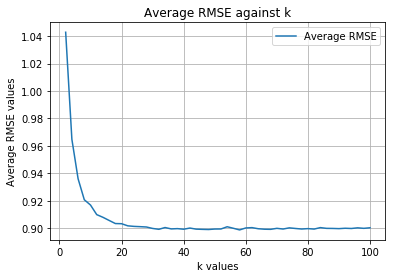

In [75]:
# Print the RMSEs
print('Average RMSE in the popular movie trimmed test set:\n', RMSEs_trim_popular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_popular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_popular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question12.png')  # Save the figure
plt.show()

#### Question 13: Design a k-NN collaborative filter (unpopular movie trimming)

In [76]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import matplotlib.pyplot as plt

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # compute similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_unpopular = []

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with more than 2 ratings
            if mid_count[0, 1] > 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_unpopular.append(np.average(temp_RMSEs))

Average RMSE in the unpopular movie trimmed test set:
 [1.1869829350159118, 1.1780641891992893, 1.1800999478431171, 1.1906615886859018, 1.1838002675587158, 1.1844177879230007, 1.1857408749975888, 1.1784338596068606, 1.1775467273391489, 1.182492428910241, 1.183323031046662, 1.1775612459344282, 1.180459031562453, 1.1781037221778841, 1.1822372820850311, 1.1874209746040123, 1.1861388237157553, 1.1852363385576838, 1.1868342629498063, 1.1857710287274927, 1.1783385082312519, 1.1837814817049002, 1.1786579428702937, 1.1832524398600208, 1.1791541053391634, 1.1848469476938814, 1.1830185746374888, 1.1811980192693472, 1.18397858503192, 1.1814645917914237, 1.1904551121128146, 1.1829514391044924, 1.1799421679556648, 1.1823657923877566, 1.1820321000733076, 1.178226646240073, 1.1825765394383376, 1.1824512371700941, 1.1831914098019212, 1.1853117947852143, 1.1844715040917373, 1.1897213515289187, 1.1851219982997272, 1.1910842672871833, 1.1824489563678608, 1.1806142986277086, 1.181359364765123, 1.177537018

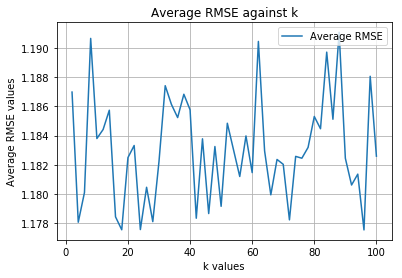

In [77]:
# Print the RMSEs
print('Average RMSE in the unpopular movie trimmed test set:\n', RMSEs_trim_unpopular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_unpopular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_unpopular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question13.png')  # Save the figure
plt.show()

#### Question 14: Design a k-NN collaborative filter (high variance movie trimming)

In [78]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import matplotlib.pyplot as plt

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # compute  similarities between users
               }

# Swipe k from 2 to 100 in step sizes of 2
ks = range(2, 102, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_high_var = []

for k in ks:
    # Use KNN model with the mean ratings of each user
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Search the movie ID and its var
            mid_var = movie_ids_vars[movie_ids_vars[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than 5 ratings or with variance less than 2
            if (mid_count[0, 1] < 5) or (mid_var[0, 1] < 2 ):
                trim_testset.remove(uid_mid_rating)
        
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_high_var.append(np.average(temp_RMSEs))

Average RMSE in the high variance movie trimmed test set:
 [1.7076130384408585, 1.6258128225633179, 1.6499712439735734, 1.634377817677678, 1.6612906410108903, 1.6757085610252147, 1.610932065244874, 1.6287931504905351, 1.5833824923945832, 1.6541795934271952, 1.602054523886467, 1.6153054525253701, 1.6040157381794149, 1.6130317577956041, 1.6166854269941244, 1.5927942649242122, 1.6286701187347095, 1.6183581377574161, 1.6062319940367573, 1.6194764802076165, 1.6150425617765876, 1.6431493709331686, 1.648514128650693, 1.5744109126929222, 1.6397051881192795, 1.630935111600865, 1.6421134728214439, 1.647274115438861, 1.6676705598565764, 1.6252629841226085, 1.5941021782590699, 1.6388488372300416, 1.6305790346907507, 1.5499930806106814, 1.6387403160175686, 1.6106803692811038, 1.6075217503850709, 1.6102325845358298, 1.6314484568068419, 1.6213783044219536, 1.6118668030745382, 1.6103603844909635, 1.6152217092755294, 1.6431331906805409, 1.6159989666612258, 1.6436423951452472, 1.6838967631266168, 1.6232

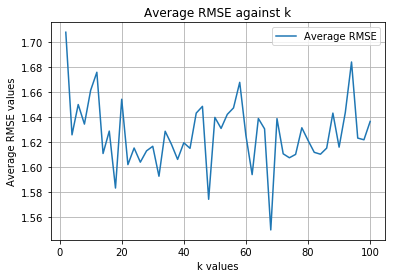

In [79]:
# Print the RMSEs
print('Average RMSE in the high variance movie trimmed test set:\n', RMSEs_trim_high_var)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_high_var))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_high_var, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question14.png')  # Save the figure
plt.show()

#### Question 15: Plot the ROC curves for the k-NN collaborative filter

In [19]:
%%capture
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans

# The k in Question10
min_k = 22

# Test set is made of 10% of the ratings
trainset, testset = train_test_split(data, test_size=.1)

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # compute  similarities between users
               }

# Use KNN model with the mean ratings of each user
algo = KNNWithMeans(k=min_k, sim_options=sim_options)

# Predict the rating 
predictions = algo.fit(trainset).test(testset)

# Store true ratings and predicted ratings
rating_true = []
rating_predict = []

for prediction in predictions:
    rating_true.append(prediction[2])
    rating_predict.append(prediction[3])

(10001,)
ROC with threshold =  2.5


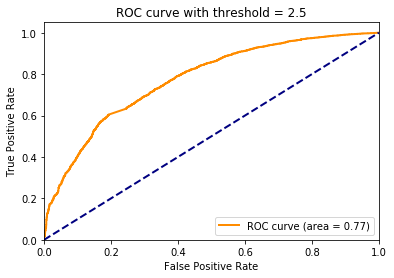

(10001,)
ROC with threshold =  3


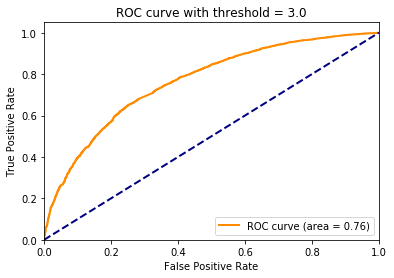

(10001,)
ROC with threshold =  3.5


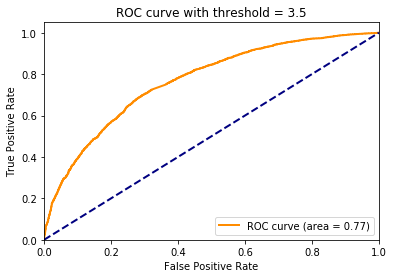

(10001,)
ROC with threshold =  4


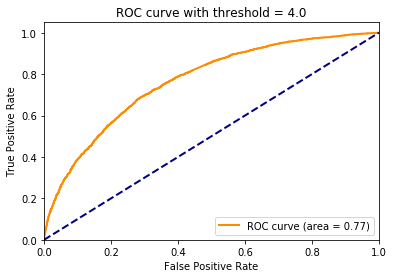

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Thresholds
thresholds = [2.5, 3, 3.5, 4]

for threshold in thresholds:
    # Change into numpy array
    np_rating_true = np.array(rating_true)
    np_rating_predict = np.array(rating_predict)
    
#     # Apply threshold
#     np_rating_true[np_rating_true < threshold] = 0
#     np_rating_true[np_rating_true >= threshold] = 1
    print(np_rating_true.shape)
    # ROC
    fpr, tpr, _ = roc_curve(np_rating_true>threshold, np_rating_predict)
    roc_auc = auc(fpr, tpr)
    
    # Plot figure
    print('ROC with threshold = ', threshold)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve with threshold = %.1f' % threshold)
    plt.legend(loc="lower right")
    plt.savefig('Figures/Question15_threshold_%.1f.png' % threshold)  # Save the figure
    plt.show()


#### Question 17: Design a NNMF-based collaborative filter to predict the ratings

Average RMSE:
 [1.1776069449004876, 1.0665948958418625, 1.0108655159772852, 0.97512073007197719, 0.95748127914646264, 0.94540502127275838, 0.9416371219114904, 0.9383364316370375, 0.93632405265230878, 0.93973194195986987, 0.94080167556654648, 0.94317924377238127, 0.94698873469756573, 0.95078751362031022, 0.95407815073848057, 0.95992585387906271, 0.9627448798634074, 0.96454710839566216, 0.96878612905390715, 0.97211733971950698, 0.97629044465126902, 0.98100685757272521, 0.98530326720351213, 0.98834114764974701, 0.99220491261299715] 
Average MAE:
 [0.99612859067041337, 0.87722297202353094, 0.81367378998752504, 0.77206088073814239, 0.74994260227609977, 0.73336769644385291, 0.72513870991246543, 0.71910895829948018, 0.71503511231951766, 0.71495645647829098, 0.71332946421285881, 0.71389150565214721, 0.71603278587458463, 0.71692617505661271, 0.71842393088944945, 0.72165471114305857, 0.72399276482083852, 0.72540487369173301, 0.72774374174596168, 0.73084601698510676, 0.73380756383110657, 0.737617

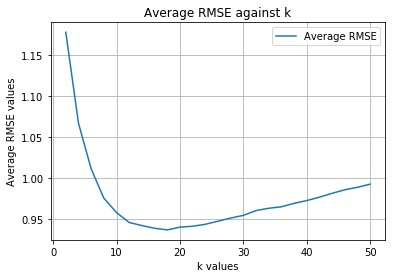

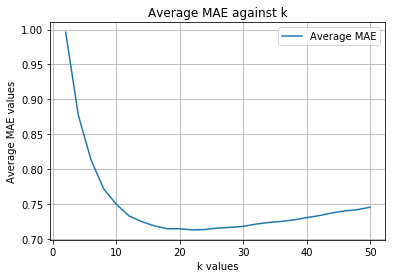

In [36]:
from surprise import NMF
from surprise.model_selection import cross_validate

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Store mean RMSE and MAE
RMSEs = []
MAEs = []

for k in ks:
    # Use NMF
    algo = NMF(n_factors=k)

    # Cross validation
    result_dict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))

# Print the average results
print('Average RMSE:\n', RMSEs,
      '\nAverage MAE:\n', MAEs)

# Plot the RMSE graph
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question17_RMSE.png')  # Save the figure
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question17_MAE.png')  # Save the figure
plt.show()

#### Question 18: Use the plot from question 17, to find the optimal number of latent factors

In [44]:
# Print the min error and k
print('Minimum RMSEs: ', np.min(RMSEs),
      '\nk value for minimum RMSEs: ', ks[np.argmin(RMSEs)],
      '\nMinimum MAE: ', np.min(MAEs),
      '\nk value for minimum MAE: ', ks[np.argmin(MAEs)])

Minimum RMSEs:  0.936324052652 
k value for minimum RMSEs:  18 
Minimum MAE:  0.713329464213 
k value for minimum MAE:  22


#### Question 19: Design a NNMF collaborative filter (popular movie trimming)

In [80]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import NMF
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_popular = []

for k in ks:
    # Use NMF
    algo = NMF(n_factors=k)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than or equal to 2 ratings
            if mid_count[0, 1] <= 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_popular.append(np.average(temp_RMSEs))

Average RMSE in the popular movie trimmed test set:
 [1.1695049223615279, 1.0548529315579482, 0.99023945223385179, 0.95864199224498581, 0.93796332506824576, 0.92591462254298362, 0.91942456463052302, 0.91781914454049596, 0.91721343005147205, 0.91982758779809193, 0.92356075718779318, 0.92730362335571248, 0.92977709669459951, 0.93345315231667825, 0.93752263609319364, 0.94148275952840732, 0.94723845559118336, 0.95210816922789188, 0.95362481755347717, 0.95851604606558971, 0.96324678431615829, 0.9666965840806252, 0.97006140724770007, 0.97265004110446607, 0.97810538551884529]
The minimum average RMSE:  0.917213430051


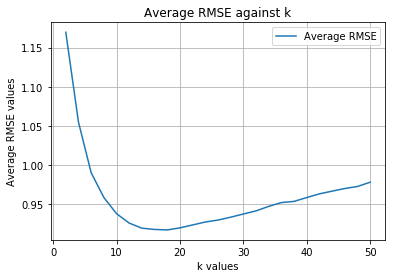

In [81]:
# Print the RMSEs
print('Average RMSE in the popular movie trimmed test set:\n', RMSEs_trim_popular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_popular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_popular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question19.png')  # Save the figure
plt.show()

#### Question 20: Design a NNMF collaborative filter (unpopular movie trimming)

In [90]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import NMF
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_unpopular = []

for k in ks:
    # Use NMF
    algo = NMF(n_factors=k)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with more than 2 ratings
            if mid_count[0, 1] > 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_unpopular.append(np.average(temp_RMSEs))

Average RMSE in the unpopular movie trimmed test set:
 [1.2695934172532688, 1.267612207523882, 1.2581850564575014, 1.2520608556897184, 1.2373640190979276, 1.2411742549875466, 1.2352642191309073, 1.2322643133394116, 1.2307513952905167, 1.2360018642958805, 1.2285102996289454, 1.2192926776588509, 1.2218164535243683, 1.223350431718873, 1.2196685706414652, 1.2213146245321913, 1.2204162709822342, 1.2219843405688144, 1.2113703453932494, 1.2175625026950194, 1.2178537868541339, 1.2173829896006063, 1.2169420376540863, 1.2151787698336904, 1.2171554795686574]
The minimum average RMSE:  1.21137034539


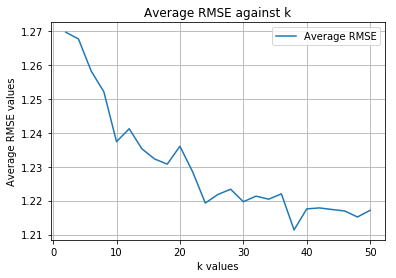

In [91]:
# Print the RMSEs
print('Average RMSE in the unpopular movie trimmed test set:\n', RMSEs_trim_unpopular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_unpopular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_unpopular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question20.png')  # Save the figure
plt.show()

#### Question 21: Design a NNMF collaborative filter (high variance movie trimming)

In [82]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import NMF
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_high_var = []

for k in ks:
    # Use NMF
    algo = NMF(n_factors=k)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Search the movie ID and its var
            mid_var = movie_ids_vars[movie_ids_vars[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than 5 ratings or with variance less than 2
            if (mid_count[0, 1] < 5) or (mid_var[0, 1] < 2 ):
                trim_testset.remove(uid_mid_rating)
        
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_high_var.append(np.average(temp_RMSEs))

Average RMSE in the high variance movie trimmed test set:
 [1.7056487812279122, 1.6626289438242043, 1.6570793799886967, 1.6810763025017537, 1.6778097696454046, 1.6766865502162105, 1.6613955298060639, 1.6163822039509022, 1.6612304169527317, 1.6771725474341834, 1.6661650614899977, 1.6820013825122859, 1.6734808808503874, 1.6359743644444216, 1.6882974950301162, 1.6602227464455481, 1.6657574078205806, 1.6450591279265221, 1.6287857248657018, 1.6580668516820989, 1.6343550288026982, 1.7125484735421463, 1.6524407788041977, 1.6853862197601306, 1.6470318094345662]
The minimum average RMSE:  1.61638220395


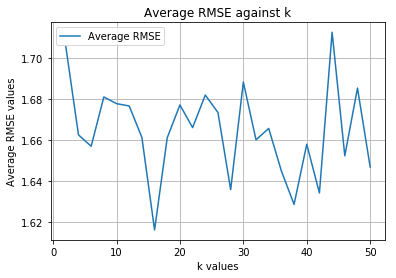

In [83]:
# Print the RMSEs
print('Average RMSE in the high variance movie trimmed test set:\n', RMSEs_trim_high_var)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_high_var))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_high_var, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question21.png')  # Save the figure
plt.show()

#### Question 22: Plot the ROC curves for the NNMF-based collaborative filter

In [8]:
%%capture
from surprise.model_selection import train_test_split
from surprise import NMF

# Optimal k in Question 22
optimal_k = 18 # Use RMSE measurement

# Test set is made of 10% of the ratings
trainset, testset = train_test_split(data, test_size=.1)

# Use NMF
algo = NMF(n_factors=optimal_k)

# Predict the rating 
predictions = algo.fit(trainset).test(testset)

# Store true ratings and predicted ratings
rating_true = []
rating_predict = []

for prediction in predictions:
    rating_true.append(prediction[2])
    rating_predict.append(prediction[3])


ROC with threshold =  2.5


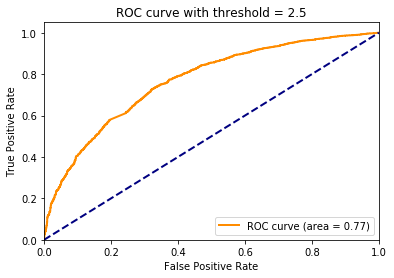

ROC with threshold =  3


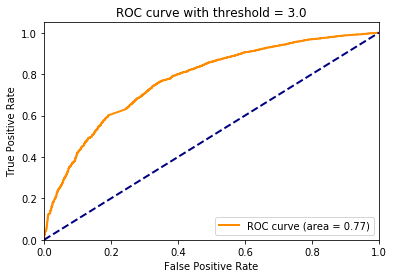

ROC with threshold =  3.5


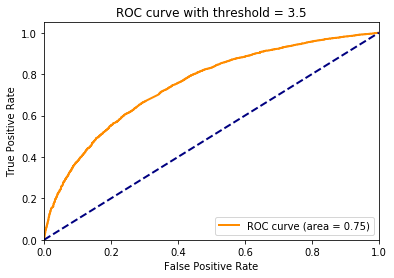

ROC with threshold =  4


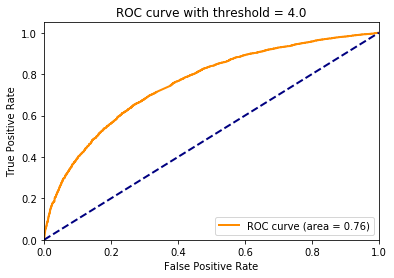

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Thresholds
thresholds = [2.5, 3, 3.5, 4]

for threshold in thresholds:
    # Change into numpy array
    np_rating_true = np.array(rating_true)
    np_rating_predict = np.array(rating_predict)
    
#     # Apply threshold
#     np_rating_true[np_rating_true < threshold] = 0
#     np_rating_true[np_rating_true >= threshold] = 1
    
    # ROC
    fpr, tpr, _ = roc_curve(np_rating_true>=threshold , np_rating_predict)
    roc_auc = auc(fpr, tpr)
    
    # Plot figure
    print('ROC with threshold = ', threshold)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve with threshold = %.1f' % threshold)
    plt.legend(loc="lower right")
    plt.savefig('Figures/Question22_threshold_%.1f.png' % threshold)  # Save the figure
    plt.show()

#### Question 23: Perform Non-negative matrix factorization on the ratings matrix

In [39]:
import csv
datareader = csv.reader(open('movies.csv', 'r'), delimiter=',')
movie_genres = []
for row in datareader:
    movie_genres.append(row) 

In [44]:
from surprise import NMF

# Get movie ID
#np_movie_ids = np.array(data.raw_ratings)
#np_movie_ids = np_movie_ids[:, 1]
# sorted_movie_ids = np.sort(movie_ids.astype(np.int32))

# Use the whole set
trainset = data.build_full_trainset()


# Perform NMF
algo = NMF(n_factors=20)
algo.fit(trainset)

# Get the V matrix and print the largest 10 IDs
for i in range(20):
    print('\nFor column %d, the top 10 movie ids:' % i)
    V = algo.qi.copy()
    # get raw movie id list 
    movie_raw_ids = [trainset.to_raw_iid(iiid) for iiid in np.argsort(V[:, i])[-10:]]
    # get genre 
    genre = []
    for mid in movie_raw_ids:
        genre.append([movieinfo for movieinfo in movie_genres if mid in movieinfo][0][2])
        
    print(movie_raw_ids)
    print(genre)
   


For column 0, the top 10 movie ids:
['5055', '37857', '1987', '1306', '1251', '3075', '1595', '1824', '250', '4483']
['Action|Drama', 'Adventure|Children|Drama|Fantasy', 'Horror', 'Adventure|Drama|Sci-Fi', 'Drama|Fantasy', 'Drama|Horror', 'Adventure|Children|Drama', 'Comedy|Thriller', 'Children|Comedy', 'Comedy']

For column 1, the top 10 movie ids:
['2990', '5172', '2563', '34338', '4368', '5387', '444', '6811', '1546', '2275']
['Action|Adventure|Thriller', 'Comedy|Drama|Romance', 'Drama', 'Comedy|Documentary', 'Comedy', 'Drama|Thriller', 'Comedy|Romance', 'Comedy', 'Comedy', 'Action|Adventure|Sci-Fi']

For column 2, the top 10 movie ids:
['6216', '4630', '72224', '132796', '3577', '2570', '69606', '8369', '6219', '5792']
['Drama', 'Action', 'Comedy', 'Action|Drama|Thriller', 'Drama|Romance', 'Drama|Romance', 'Comedy|Fantasy|Romance', 'Action|Crime|Horror|Mystery|Thriller', 'Action|Drama|Thriller', 'Comedy|Drama']

For column 3, the top 10 movie ids:
['3490', '27478', '107559', '1029

#### Question 24: Design a MF with bias collaborative filter to predict the ratings

Average RMSE:
 [0.8877239871269309, 0.8875590901400512, 0.8877860569852093, 0.8874131131531546, 0.8884605905374297, 0.8871054191776491, 0.88721717941, 0.8878617678876047, 0.8877150520903048, 0.8867617877838283, 0.887697017608633, 0.889226910292431, 0.8884554008265638, 0.8873806269664882, 0.8881436019708792, 0.8882356463964891, 0.8882720710976436, 0.8889853278233023, 0.8884022916494054, 0.8887579464660436, 0.8885656942549677, 0.8897633846496493, 0.8885180907036112, 0.8890036370695651, 0.8891695935260076] 
Average MAE:
 [0.6838271458500857, 0.684165249178386, 0.6835715606109316, 0.6833826061160713, 0.6838721701878703, 0.682753398804124, 0.6822362404713468, 0.6831071116214973, 0.683046930467111, 0.682155833118995, 0.6832481431916658, 0.6840730543959443, 0.6834365230047175, 0.6827146205031122, 0.6834670488061665, 0.6826989545951259, 0.6835227404647836, 0.6840220849584195, 0.6837202918466381, 0.684216391482004, 0.6834184282612664, 0.684698309228735, 0.683659380101193, 0.6840102915940138, 0.

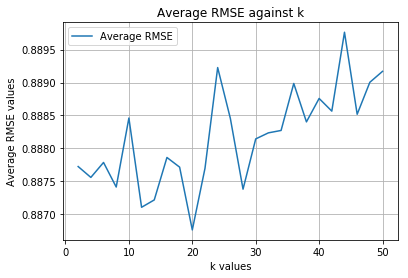

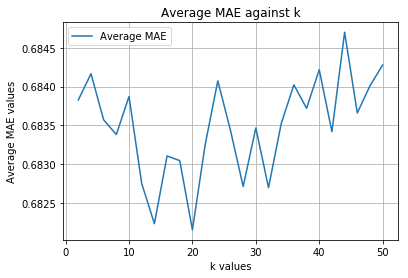

In [34]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Store mean RMSE and MAE
RMSEs = []
MAEs = []

for k in ks:
    # Use MF
    algo = SVD(n_factors=k, biased=True)

    # Cross validation
    result_dict = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    RMSEs.append(np.average(result_dict['test_rmse']))
    MAEs.append(np.average(result_dict['test_mae']))

# Print the average results
print('Average RMSE:\n', RMSEs,
      '\nAverage MAE:\n', MAEs)

# Plot the RMSE graph
plt.figure(1)
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question24_RMSE.png')  # Save the figure
plt.show()

# Plot the MAE graph
plt.figure(2)
plt.title("Average MAE against k")
plt.plot(ks, MAEs, label='Average MAE')
plt.xlabel('k values')
plt.ylabel('Average MAE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question24_MAE.png')  # Save the figure
plt.show()

#### Question 25: Use the plot from question 24, to find the optimal number of latent factors

In [35]:
# Print the min error and k
print('Minimum RMSEs: ', np.min(RMSEs),
      '\nk value for minimum RMSEs: ', ks[np.argmin(RMSEs)],
      '\nMinimum MAE: ', np.min(MAEs),
      '\nk value for minimum MAE: ', ks[np.argmin(MAEs)])

Minimum RMSEs:  0.8867617877838283 
k value for minimum RMSEs:  20 
Minimum MAE:  0.682155833118995 
k value for minimum MAE:  20


#### Question 26: Design a MF with bias collaborative filter (popular movie trimming)

In [84]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import SVD
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_popular = []

for k in ks:
    # Use MF
    algo = SVD(n_factors=k) # Default biased is True

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than or equal to 2 ratings
            if mid_count[0, 1] <= 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_popular.append(np.average(temp_RMSEs))

Average RMSE in the popular movie trimmed test set:
 [0.87994626282846777, 0.87951984062600452, 0.88022848890332084, 0.88011673035937188, 0.87927755816887654, 0.8804828134317727, 0.87956220186413547, 0.87916524552254471, 0.87973621990099526, 0.87998157186120507, 0.88016538218846185, 0.88105987840324895, 0.88003647824372033, 0.88020492293710129, 0.88180205188427208, 0.88039171622384504, 0.87932370518829239, 0.88021942321044233, 0.88135968268916631, 0.88204170505275636, 0.8816020879940345, 0.88086421628131661, 0.88067219836309218, 0.88203727491044126, 0.8813080724372695]
The minimum average RMSE:  0.879165245523


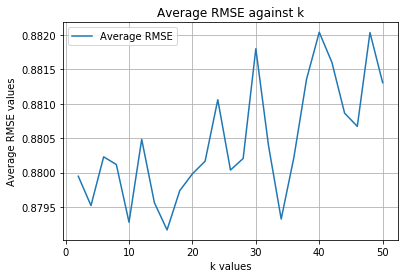

In [85]:
# Print the RMSEs
print('Average RMSE in the popular movie trimmed test set:\n', RMSEs_trim_popular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_popular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_popular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question26.png')  # Save the figure
plt.show()

#### Question 27: Design a MF with bias collaborative filter (unpopular movie trimming)

In [86]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import SVD
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_unpopular = []

for k in ks:
    # Use MF
    algo = SVD(n_factors=k)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with more than 2 ratings
            if mid_count[0, 1] > 2:
                trim_testset.remove(uid_mid_rating)
                
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_unpopular.append(np.average(temp_RMSEs))

Average RMSE in the unpopular movie trimmed test set:
 [1.0082427864833428, 1.0098590766485489, 1.008254030810785, 1.0140972071362746, 1.0113616396831824, 1.0107881433573649, 1.0105110161770348, 1.0121562222183571, 1.0132818868791489, 1.0094104800105823, 1.0113120830319704, 1.0117820802226878, 1.0131828978682251, 1.0143803628636303, 1.016340783106032, 1.0159668750302737, 1.0122149334844952, 1.0113144778644254, 1.0113177669725495, 1.0147753379177915, 1.013253302051051, 1.0122321163266883, 1.0094644540246169, 1.0127935113053137, 1.0139614052216865]
The minimum average RMSE:  1.00824278648


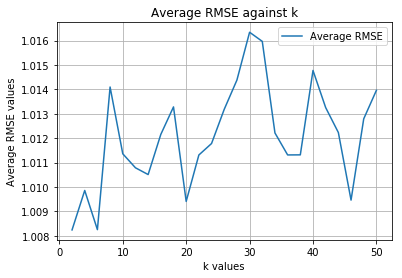

In [87]:
# Print the RMSEs
print('Average RMSE in the unpopular movie trimmed test set:\n', RMSEs_trim_unpopular)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_unpopular))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_unpopular, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question27.png')  # Save the figure
plt.show()

#### Question 28: Design a MF with bias collaborative filter (high variance movie trimming)

In [88]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import SVD
import matplotlib.pyplot as plt

# Swipe k from 2 to 50 in step sizes of 2
ks = range(2, 52, 2)

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSEs_trim_high_var = []

for k in ks:
    # Use MF
    algo = SVD(n_factors=k)

    # Store RMSE for each validation
    temp_RMSEs = []

    # Validation
    for trainset, testset in kf.split(data):
        # Train
        algo.fit(trainset)
        
        # Trim testset
        trim_testset = testset.copy()
        for uid_mid_rating in testset:
            # Search the movie ID and its count
            mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]
            
            # Search the movie ID and its var
            mid_var = movie_ids_vars[movie_ids_vars[:, 0] == int(uid_mid_rating[1])]
            
            # Delete movie with less than 5 ratings or with variance less than 2
            if (mid_count[0, 1] < 5) or (mid_var[0, 1] < 2 ):
                trim_testset.remove(uid_mid_rating)
        
        # Test
        predictions = algo.test(trim_testset, verbose=False)

        # Compute RMSE
        temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

    # Store average RMSE
    RMSEs_trim_high_var.append(np.average(temp_RMSEs))

Average RMSE in the high variance movie trimmed test set:
 [1.4997562159434543, 1.5045508564402428, 1.5031986077497781, 1.4885995219974713, 1.4991064104286034, 1.4929568228027756, 1.4983368648272841, 1.5005097511513228, 1.5150794947882424, 1.5088655363569203, 1.4982804353837955, 1.4792605674491845, 1.4889353072964808, 1.4995754298715558, 1.4883497950287174, 1.5119383666316513, 1.5114903875192822, 1.495209517184318, 1.4878511807700909, 1.4990568008095837, 1.4991924301854795, 1.4996324439988198, 1.5062172113330417, 1.5041875642700344, 1.5094743049568939]
The minimum average RMSE:  1.47926056745


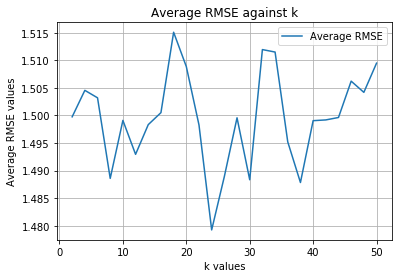

In [89]:
# Print the RMSEs
print('Average RMSE in the high variance movie trimmed test set:\n', RMSEs_trim_high_var)

# Print the minimum average RMSE
print('The minimum average RMSE: ', np.min(RMSEs_trim_high_var))

# Plot the RMSE graph
plt.figure()
plt.title("Average RMSE against k")
plt.plot(ks, RMSEs_trim_high_var, label='Average RMSE')
plt.xlabel('k values')
plt.ylabel('Average RMSE values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question28.png')  # Save the figure
plt.show()

#### Question 29: Plot the ROC curves for the MF with bias collaborative filter

In [ ]:
%%capture
from surprise.model_selection import train_test_split
from surprise import SVD
# Thresholds
thresholds = [2.5, 3, 3.5, 4]

# Optimal k in Question 25
optimal_k = 22 # Use RMSE measurement

# Test set is made of 10% of the ratings
trainset, testset = train_test_split(data, test_size=.1)

# Use MF
algo = SVD(n_factors=optimal_k)

# Predict the rating 
predictions = algo.fit(trainset>).test(testset)

# Store true ratings and predicted ratings
rating_true = []
rating_predict = []

for prediction in predictions:
    rating_true.append(prediction[2])
    rating_predict.append(prediction[3])

ROC with threshold =  2.5


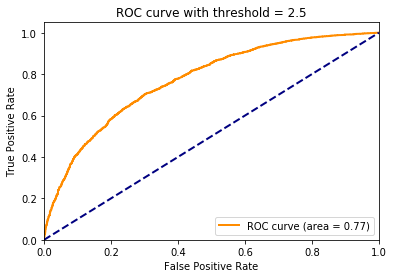

ROC with threshold =  3


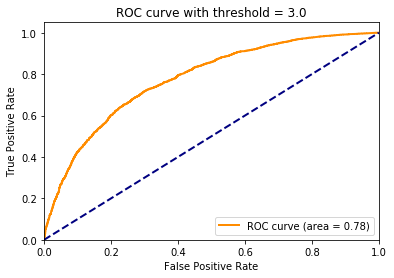

ROC with threshold =  3.5


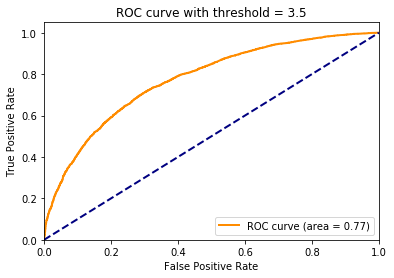

ROC with threshold =  4


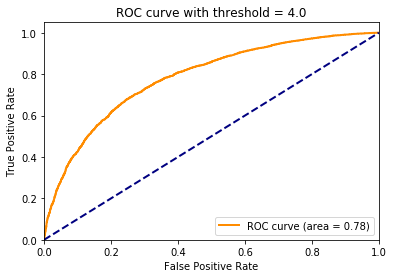

In [41]:




for threshold in thresholds:
    # Change into numpy array
    np_rating_true = np.array(rating_true)
    np_rating_predict = np.array(rating_predict)
    
    # Apply threshold
    np_rating_true[np_rating_true < threshold] = 0
    np_rating_true[np_rating_true >= threshold] = 1
    
    # ROC
    fpr, tpr, _ = roc_curve(np_rating_true, np_rating_predict)
    roc_auc = auc(fpr, tpr)
    
    # Plot figure
    print('ROC with threshold = ', threshold)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve with threshold = %.1f' % threshold)
    plt.legend(loc="lower right")
    plt.savefig('Figures/Question29_threshold_%.1f.png' % threshold)  # Save the figure
    plt.show()

#### Naive prediction class

In [147]:
# Calculate the mean for each user
# Change ratings into numpy array
np_user_ids_ratings = np.array(data.raw_ratings)
np_user_ids_ratings = np_user_ids_ratings[:, [0, 2]].astype(np.float)  # Select the user ids and ratings

# Calculate variance
user_means = np.zeros(user_ids.shape)
for i in range(len(user_ids)):
    user_means[i] = np.mean(np_user_ids_ratings[np_user_ids_ratings[:, 0] == int(user_ids[i])][:, 1])

# Get the movie ID and var table
user_ids_means = np.concatenate((user_ids.reshape(-1, 1), user_means.reshape(-1, 1)), axis=1).astype(np.float)

In [17]:
from surprise import AlgoBase

class NaiveFilter(AlgoBase):
    

    def __init__(self,user_mean):
        AlgoBase.__init__(self)
        self.user_mean = user_mean
    
    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        return self
    
    def estimate(self, u, i):
#         mean = self.trainset.global_mean

#         if self.trainset.knows_user(u):
        mean = np.mean([r for (_, r) in self.trainset.ur[u]])
        
        return mean      

#### Question 30: Design a naive collaborative filter to predict the ratings

In [18]:
%%capture
from surprise.model_selection import KFold
from surprise import accuracy   

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSE = 0

# Use naive filter
algo = NaiveFilter(user_mean)

# Store RMSE for each validation
temp_RMSEs = []

# Validation
for trainset, testset in kf.split(data):
    # Train
    algo.fit(data.build_full_trainset())

    # Test
    predictions = algo.test(testset, verbose=False)

    # Compute RMSE
    temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

# Store average RMSE
RMSE = np.average(temp_RMSEs)

In [19]:
# Print the average result
print('Average RMSE:\n', RMSE)

Average RMSE:
 0.9553891735631286


#### Question 31: Design a naive collaborative filter (popular movie trimming)

In [20]:
#%%capture
from surprise.model_selection import KFold
from surprise import accuracy

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSE_trim_popular = 0

# Use naive filter
algo = NaiveFilter(user_mean)

# Store RMSE for each validation
temp_RMSEs = []

# Validation
for trainset, testset in kf.split(data):
    # Train
    algo.fit(data.build_full_trainset())
    

    # Trim testset
    trim_testset = testset.copy()
    for uid_mid_rating in testset:
        # Search the movie ID and its count
        mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]

        # Delete movie with less than or equal to 2 ratings
        if mid_count[0, 1] <= 2:
            trim_testset.remove(uid_mid_rating)

    # Test
    predictions = algo.test(trim_testset, verbose=False)

    # Compute RMSE
    temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

# Store average RMSE
RMSE_trim_popular = np.average(temp_RMSEs)

In [21]:
# Print the average result
print('Average RMSE:\n', RMSE_trim_popular)

Average RMSE:
 0.9521187066131747


#### Question 32: Design a naive collaborative filter (unpopular movie trimming)

In [22]:
from surprise.model_selection import KFold
from surprise import accuracy       

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSE_trim_unpopular = 0

# Use naive filter
algo = NaiveFilter(user_mean)

# Store RMSE for each validation
temp_RMSEs = []

# Validation
for trainset, testset in kf.split(data):
    # Train
    algo.fit(data.build_full_trainset())

    # Trim testset
    trim_testset = testset.copy()
    for uid_mid_rating in testset:
        # Search the movie ID and its count
        mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]

        # Delete movie with more than 2 ratings
        if mid_count[0, 1] > 2:
            trim_testset.remove(uid_mid_rating)

    # Test
    predictions = algo.test(trim_testset, verbose=False)

    # Compute RMSE
    temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

# Store average RMSE
RMSE_trim_unpopular = np.average(temp_RMSEs)

In [23]:
# Print the average result
print('Average RMSE:\n', RMSE_trim_unpopular)

Average RMSE:
 1.0103312684692107


#### Question 33: Design a naive collaborative filter (high variance movie trimming)

In [24]:
from surprise.model_selection import KFold
from surprise import accuracy

# Define a cross-validation iterator
kf = KFold(n_splits=10)

# Store average RMSE
RMSE_trim_high_var = 0

# Use naive filter
algo = NaiveFilter(user_mean)

# Store RMSE for each validation
temp_RMSEs = []

# Validation
for trainset, testset in kf.split(data):
    # Train
    algo.fit(data.build_full_trainset())

    # Trim testset
    trim_testset = testset.copy()
    for uid_mid_rating in testset:
        # Search the movie ID and its count
        mid_count = movie_ids_counts[movie_ids_counts[:, 0] == int(uid_mid_rating[1])]

        # Search the movie ID and its var
        mid_var = movie_ids_vars[movie_ids_vars[:, 0] == int(uid_mid_rating[1])]

        # Delete movie with less than 5 ratings or with variance less than 2
        if (mid_count[0, 1] < 5) or (mid_var[0, 1] < 2 ):
            trim_testset.remove(uid_mid_rating)

    # Test
    predictions = algo.test(trim_testset, verbose=False)

    # Compute RMSE
    temp_RMSEs.append(accuracy.rmse(predictions, verbose=False))

# Store average RMSE
RMSE_trim_high_var = np.average(temp_RMSEs)

In [25]:
# Print the average result
print('Average RMSE:\n', RMSE_trim_high_var)

Average RMSE:
 1.499031094026698


#### Question 34: Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters

In [26]:
%%capture
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import NMF
from surprise import SVD

# Optimal ks
k_KNN = 22
k_NMF = 18
k_MF = 20

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

# Test set is made of 10% of the ratings
trainset, testset = train_test_split(data, test_size=.1)

# Use different filters
algo1 = KNNWithMeans(k=k_KNN, sim_options=sim_options)
algo2 = NMF(n_factors=k_NMF)
algo3 = SVD(n_factors=k_MF)

all_predictions = []
# Predict the rating
all_predictions.append(algo1.fit(trainset).test(testset))
all_predictions.append(algo2.fit(trainset).test(testset))
all_predictions.append(algo3.fit(trainset).test(testset))

# Store true ratings and predicted ratings
rating_true = []
ratings_predict = [[] for i in range(3)]

for i in range(len(all_predictions)):
    predictions = all_predictions[i]
    for prediction in predictions:
        ratings_predict[i].append(prediction[3])

for prediction in all_predictions[0]:
    rating_true.append(prediction[2])

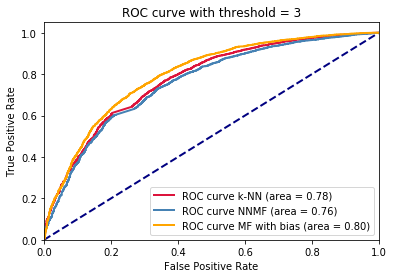

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Apply threshold
np_rating_true = np.array(rating_true)
np_rating_true[np_rating_true < 3] = 0
np_rating_true[np_rating_true >= 3] = 1

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve with threshold = 3')

labels = ['k-NN', 'NNMF', 'MF with bias']
colors = ['crimson', 'steelblue', 'orange']
for i in range(3):
    # Change into numpy array
    np_rating_predict = np.array(ratings_predict[i])

    # ROC
    fpr, tpr, _ = roc_curve(np_rating_true, np_rating_predict)
    roc_auc = auc(fpr, tpr)

    # Plot figure
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=('ROC curve ' + labels[i] + ' (area = %0.2f)') % roc_auc)

plt.legend(loc="lower right")
# Save the figure
plt.savefig('Figures/Question34')  
plt.show()

#### The function provided by 'surprise' to calculate precision ang recall

In [8]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    recalls = []
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        
         #drop the G = 0
        if n_rel !=0 or len(user_ratings)>=k:
           
            # Number of recommended items in top k
            n_rec_k = sum((est >= 0) for (est, _) in user_ratings[:k])

            # Number of relevant and recommended items in top k
            n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= 0))
                                  for (est, true_r) in user_ratings[:k])

            # Precision@K: Proportion of recommended items that are relevant
            precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)

            # Recall@K: Proportion of relevant items that are recommended
            recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    return precisions, recalls

#### Question 36: Plot average precision against t for the ranking obtained using k-NN collaborative filter predictions

In [9]:
%%capture
from surprise import KNNWithMeans
from surprise.model_selection import KFold

# Optimal k
k_KNN = 22

kf = KFold(n_splits=10)

# Use person correlation coefficient
sim_options = {'name': 'pearson',
               'user_based': True  # Compute similarities between users
               }

algo = KNNWithMeans(k=k_KNN, sim_options=sim_options)

# Store the average precisions and recalls
knn_precisions_avg = []
knn_recalls_avg = []

for t in range(1, 26):
    
    temp_precisions = []
    temp_recalls = []
    
    for trainset, testset in kf.split(data):
        
        
        algo.fit(trainset)
        predictions = algo.test(testset) 
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)
        
        #avoid testset is all G= 0
        if len(precisions) != 0:
            temp_precisions.append(sum(precisions) / len(precisions))
            temp_recalls.append(sum(recalls) / len(recalls))
    
    knn_precisions_avg.append(np.average(temp_precisions))
    knn_recalls_avg.append(np.average(temp_recalls))

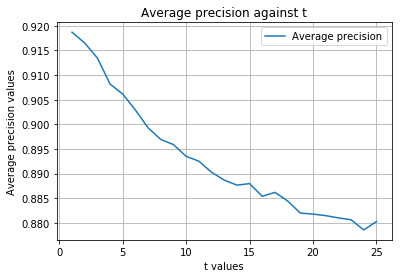

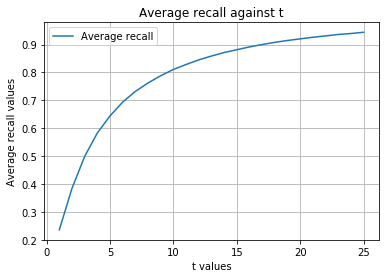

In [10]:
import matplotlib.pyplot as plt

# Plot the precision
plt.figure(1)
plt.title("Average precision against t")
plt.plot(range(1, 26), knn_precisions_avg, label='Average precision')
plt.xlabel('t values')
plt.ylabel('Average precision values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question36_precision.png')  # Save the figure
plt.show()

# Plot the recall
plt.figure(2)
plt.title("Average recall against t")
plt.plot(range(1, 26), knn_recalls_avg, label='Average recall')
plt.xlabel('t values')
plt.ylabel('Average recall values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question36_recall.png')  # Save the figure
plt.show()

#### Question 37: Plot average precision against t for the ranking obtained using NNMF collaborative filter predictions

In [11]:
%%capture
from surprise import NMF
from surprise.model_selection import KFold

# Optimal k
k_NMF = 18
kf = KFold(n_splits=10)
algo = NMF(n_factors=k_NMF)

# Store the average precisions and recalls
nmf_precisions_avg = []
nmf_recalls_avg = []

for t in range(1, 26):
    
    temp_precisions = []
    temp_recalls = []
    
    for trainset, testset in kf.split(data):
        
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

        # Precision and recall can then be averaged over all users
        if len(precisions) != 0:
            temp_precisions.append(sum(precisions) / len(precisions))
            temp_recalls.append(sum(recalls) / len(recalls))
    
    nmf_precisions_avg.append(np.average(temp_precisions))
    nmf_recalls_avg.append(np.average(temp_recalls))

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (25,) and (19,)

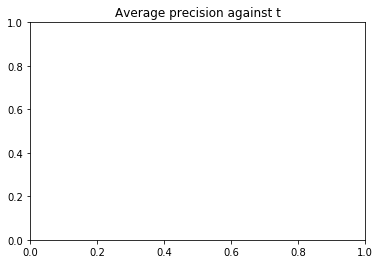

In [12]:
import matplotlib.pyplot as plt

# Plot the precision
plt.figure(1)
plt.title("Average precision against t")
plt.plot(range(1, 26), nmf_precisions_avg, label='Average precision')
plt.xlabel('t values')
plt.ylabel('Average precision values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question37_precision.png')  # Save the figure
plt.show()

# Plot the recall
plt.figure(2)
plt.title("Average recall against t")
plt.plot(range(1, 26), nmf_recalls_avg, label='Average recall')
plt.xlabel('t values')
plt.ylabel('Average recall values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question37_recall.png')  # Save the figure
plt.show()

#### Question 38: Plot average precision against t for the ranking obtained using MF collaborative filter predictions

In [ ]:
%%capture
from surprise import SVD
from surprise.model_selection import KFold

# Optimal k
k_SVD = 20
kf = KFold(n_splits=10)
algo = SVD(n_factors=k_SVD)

# Store the average precisions and recalls
mf_precisions_avg = []
mf_recalls_avg = []

for t in range(1, 26):
    
    temp_precisions = []
    temp_recalls = []
    
    for trainset, testset in kf.split(data):
        
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

        # Precision and recall can then be averaged over all users
        if len(precisions) != 0:
            temp_precisions.append(sum(precisions) / len(precisions))
            temp_recalls.append(sum(recalls) / len(recalls))
    
    mf_precisions_avg.append(np.average(temp_precisions))
    mf_recalls_avg.append(np.average(temp_recalls))

In [ ]:
import matplotlib.pyplot as plt

# Plot the precision
plt.figure(1)
plt.title("Average precision against t")
plt.plot(range(1, 26), mf_precisions_avg, label='Average precision')
plt.xlabel('t values')
plt.ylabel('Average precision values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question38_precision.png')  # Save the figure
plt.show()

# Plot the recall
plt.figure(2)
plt.title("Average recall against t")
plt.plot(range(1, 26), mf_recalls_avg, label='Average recall')
plt.xlabel('t values')
plt.ylabel('Average recall values')
plt.legend()
plt.grid()
plt.savefig('Figures/Question38_recall.png')  # Save the figure
plt.show()

#### Question 39: Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure

In [ ]:
# Plot the precision-recall curve
plt.figure()
plt.title("Precision-recall curve")
plt.plot(knn_recalls_avg, knn_precisions_avg, label='k-NN')
plt.plot(nmf_recalls_avg, nmf_precisions_avg, label='NNMF')
plt.plot(mf_recalls_avg, mf_precisions_avg, label='MF with bias')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.savefig('Figures/Question39.png')  # Save the figure
plt.show()